In [75]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


In [76]:
# Caminho do arquivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Define o nome das colunas
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, header=None, names=header)

In [77]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [78]:
# Retorna um trecho com as 5 primeiras linhas do dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [80]:
# Mostra informações sobre o dataframe em si
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
# class distribution
print(df.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Desafio 2

Aplique os métodos que achar conveniente (vimos algumas opções na última aula) para visualizar os dados de forma gráfica.


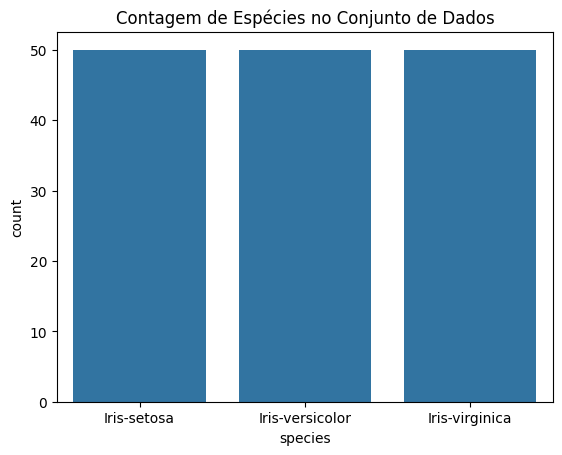

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras da contagem de espécies
sns.countplot(x='species', data=df)
plt.title('Contagem de Espécies no Conjunto de Dados')
plt.show()







## PARE!!!

A análise feita no desafio 2 é uma das etapas mais importantes. Caso você tenha pulado essa etapa, volte e faça suas análises.

Com essa etapa concluída, vamos criar um sub-dataset com os atributos que serão utilizados.


In [83]:
# Selecionando um sub-dataframe com os campos petal_length e petal_width,
# e outro com a variável de classes
entradas = df[['petal_length', 'petal_width']]
classes = df['species']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (150, 2) e classes (150,)


## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***

***scikit-learn***: pip3 install scikit-learn



In [84]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (120, 2) e teste (30, 2)


In [85]:
#Primeiras linhas do dataframe
entradas_treino.head(20)

,petal_length,petal_width
7,1.5,0.2
81,3.7,1.0
116,5.5,1.8
118,6.9,2.3
115,5.3,2.3
49,1.4,0.2
33,1.4,0.2
134,5.6,1.4
102,5.9,2.1
45,1.4,0.3


In [86]:
classes_treino.head()

7          Iris-setosa
81     Iris-versicolor
116     Iris-virginica
118     Iris-virginica
115     Iris-virginica
Name: species, dtype: object

## Chegou a hora de aplicar o modelo preditivo

Treinar um modelo no python é simples se usar o Scikit-Learn.
Treinar um modelo no Scikit-Learn é simples: basta criar o classificador, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



In [87]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 7
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)




KNeighborsClassifier(n_neighbors=7)

Pronto!! bora testar se esta funcionando....


In [88]:
# Para obter as previsões, basta chamar o método predict()
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: ['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']


In [89]:
# Para determinar a quantidade de acertos (acuracia)

from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  1.0


## Utilizando o modelo treinado com amostras fora do dataset

Vamos colocar alguns valores e ver a predição do classificador.

In [90]:
# Criamos um modelo utilizando duas entradas e uma saida, logo temos que passar duas entradas para o modelo faça a predição.
# Exemplo 1
modelo.predict([[3.3, 3.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [91]:
# Exemplo 2
Test = pd.DataFrame([[2.8, 1.7]], columns=['petal_length', 'petal_width'])
previsao = modelo.predict(Test)
print("Previsão:", previsao)

Previsão: ['Iris-versicolor']
